In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

import scipy.stats
import os

student = pd.read_csv("./StudentsPerformance.csv")
print(student.shape)
print(student.head())


(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
student.info()
student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
sp = student.copy()

print(sp.shape)
sp.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
sp_gender = sp["gender"].value_counts()

In [17]:
for i in ['gender','race/ethnicity', 'parental level of education', 'lunch',\
         'test preparation course']:
    print(i+' distribution')
    print(sp[i].value_counts())
    print('####################################################')

gender distribution
female    518
male      482
Name: gender, dtype: int64
####################################################
race/ethnicity distribution
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
####################################################
parental level of education distribution
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
####################################################
lunch distribution
standard        645
free/reduced    355
Name: lunch, dtype: int64
####################################################
test preparation course distribution
none         642
completed    358
Name: test preparation course, dtype: int64
####################################################


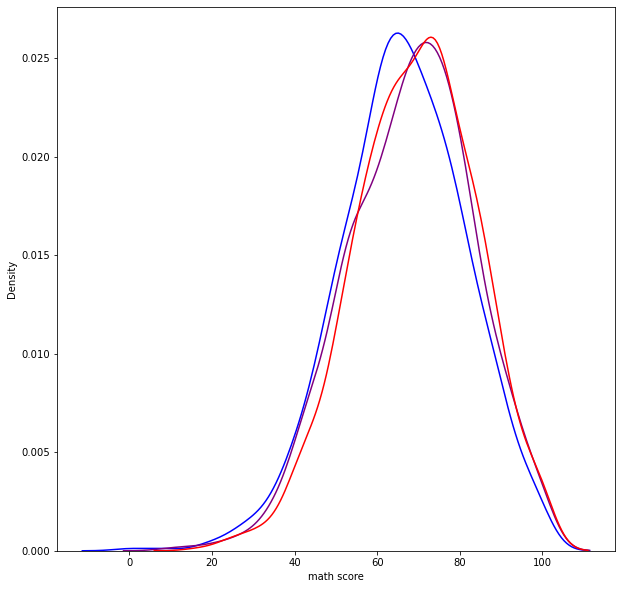

In [20]:
plt.figure(figsize=(10,10))
sns.kdeplot(sp['math score'],  color='blue')
sns.kdeplot(sp['writing score'],  color='purple')
sns.kdeplot(sp['reading score'], color='red')
plt.show()

In [21]:
sp.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

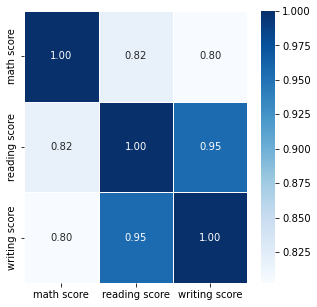

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(data = sp.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

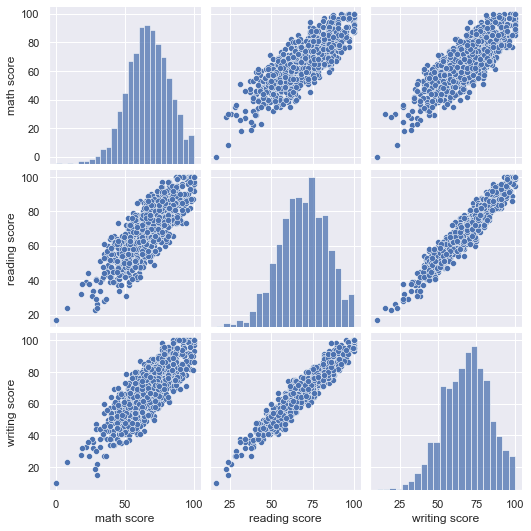

In [29]:
sns.set()
sns.pairplot(sp)
plt.show()

In [31]:
sp.groupby('race/ethnicity').mean().style.background_gradient(cmap = "OrRd")

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [32]:
sp.groupby('lunch').mean().style.background_gradient(cmap = "OrRd")

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [33]:
sp.groupby('parental level of education').mean().style.background_gradient(cmap = "OrRd")

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [38]:
sp_m_math = sp[sp['gender']=='male']
sp_f_math = sp[sp['gender']=='female']
scipy.stats.ttest_ind(sp_m_math['math score'], sp_f_math['math score'], equal_var=False)

Ttest_indResult(statistic=5.398000564160736, pvalue=8.420838109090415e-08)

In [40]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

sp['Grade'] = sp.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

sp.Grade.value_counts()

KeyError: 'Percentage'

In [42]:
sp['OverAll_PassStatus'] = sp.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

sp.OverAll_PassStatus.value_counts()

KeyError: 'Math_PassStatus'